In [293]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (7,5)
warnings.filterwarnings('ignore')

In [294]:
df = pd.read_csv('Data/adult.csv')
print(f'Shape of our data set is {df.shape}')

Shape of our data set is (48842, 15)


# Objectives for Exploratory Data Analysis (EDA)
1. **Data Overview**: Understand the structure of the dataset, including the types and distribution of each feature.
    - Display the first few rows of the dataset.
    - Check for missing values and handle them appropriately.
    - Summarize the statistics for numerical features.
2. **Univariate Analysis**: Analyze the distribution of individual features.
    - Plot histograms and boxplots for numerical features.
    - Plot bar charts for categorical features.
3. **Bivariate Analysis**: Analyze the relationships between features and the target variable `income`.
    - Create boxplots and violin plots for numerical features against `income`.
    - Create bar plots and count plots for categorical features against `income`.
4. **Multivariate Analysis**: Analyze the interactions between multiple features.
    - Use pair plots or correlation heatmaps for numerical features.
    - Analyze interactions between categorical features and the target variable.
5. **Feature Engineering**: Create new features or modify existing ones if necessary.
    - Explore the creation of new features that may better capture the information in the data.

# Objectives for Principal Component Analysis (PCA)
1. **Standardization**: Standardize the numerical features to have zero mean and unit variance.
    - Apply standardization to ensure all features contribute equally to the PCA.
2. **PCA Implementation**: Perform PCA to reduce the dimensionality of the dataset.
    - Determine the number of principal components to retain by analyzing the explained variance ratio.
3. **Visualization**: Visualize the results of the PCA.
    - Plot the explained variance ratio for each principal component.
    - Create scatter plots of the first two or three principal components to visualize the data in reduced dimensions.
4. **Interpretation**: Interpret the principal components.
    - Analyze the loadings of the original features on the principal components to understand what each principal component represents.

# Objectives for Classification Model
1. **Data Preparation**: Prepare the data for modeling.
    - Encode categorical features using techniques such as one-hot encoding.
    - Split the data into training and testing sets.
2. **Model Selection**: Choose appropriate classification algorithms.
    - Explore various models such as Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines.
3. **Model Training**: Train the selected models on the training data.
    - Use cross-validation to tune hyperparameters and prevent overfitting.
4. **Model Evaluation**: Evaluate the performance of the models.
    - Use metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.
    - Compare the performance of different models and select the best one.
5. **Model Interpretation**: Interpret the results of the classification model.
    - Analyze feature importances or coefficients to understand which features contribute most to the predictions.
6. **Model Deployment**: Prepare the final model for deployment.
    - Save the trained model and create a pipeline for new data predictions.
7. **Model Validation**: Validate the model on unseen data.
    - Ensure that the model generalizes well to new, unseen data by testing it on a separate validation set or using techniques like k-fold cross-validation.


# Cleaning Data

In [295]:
col_names = [col_name for col_name in df.select_dtypes(include=['object']).columns]
for col_name in col_names:
    df[col_name] = df[col_name].replace('?', 'not-specified')

# <center>EDA</center>

### Objectives for Exploratory Data Analysis (EDA)
1. **Data Overview**:
    - Display the first few rows of the dataset.

# Dataset Explanation

The dataset comprises 46,033 observations and 15 features. Each feature provides different information about individuals, and these features are used to analyze and predict their income levels. Below is a detailed explanation of each feature:

1. **age**: 
    - Data Type: int64
    - Description: Represents the age of the individual in years.
    - Non-Null Count: 46,033 (No missing values)

2. **workclass**: 
    - Data Type: object
    - Description: Indicates the type of employment (e.g., Private, Self-Employed).
    - Non-Null Count: 46,033 (No missing values)

3. **fnlwgt**: 
    - Data Type: int64
    - Description: Final weight, which is a statistical weight assigned to the individual.
    - Non-Null Count: 46,033 (No missing values)

4. **education**: 
    - Data Type: object
    - Description: Indicates the highest level of education attained by the individual.
    - Non-Null Count: 46,033 (No missing values)

5. **educational-num**: 
    - Data Type: int64
    - Description: Numerical representation of the education level.
    - Non-Null Count: 46,033 (No missing values)

6. **marital-status**: 
    - Data Type: object
    - Description: Indicates the marital status of the individual (e.g., Married, Single).
    - Non-Null Count: 46,033 (No missing values)

7. **occupation**: 
    - Data Type: object
    - Description: Represents the occupation of the individual (e.g., Technician, Executive).
    - Non-Null Count: 46,033 (No missing values)

8. **relationship**: 
    - Data Type: object
    - Description: Indicates the relationship of the individual within a household (e.g., Husband, Not-in-family).
    - Non-Null Count: 46,033 (No missing values)

9. **race**: 
    - Data Type: object
    - Description: Represents the race of the individual (e.g., White, Black).
    - Non-Null Count: 46,033 (No missing values)

10. **gender**: 
    - Data Type: object
    - Description: Indicates the gender of the individual (e.g., Male, Female).
    - Non-Null Count: 46,033 (No missing values)

11. **capital-gain**: 
    - Data Type: int64
    - Description: Represents the capital gains of the individual.
    - Non-Null Count: 46,033 (No missing values)

12. **capital-loss**: 
    - Data Type: int64
    - Description: Represents the capital losses of the individual.
    - Non-Null Count: 46,033 (No missing values)

13. **hours-per-week**: 
    - Data Type: int64
    - Description: Indicates the number of hours the individual works per week.
    - Non-Null Count: 46,033 (No missing values)

14. **native-country**: 
    - Data Type: object
    - Description: Indicates the native country of the individual.
    - Non-Null Count: 46,033 (No missing values)

15. **income**: 
    - Data Type: object
    - Description: Target variable indicating whether the individual's income is more than 50k or not. It holds two values: '>50K' or '<=50K'.
    - Non-Null Count: 46,033 (No missing values)

This dataset is well-suited for classification tasks aimed at predicting whether an individual's income exceeds 50k based on their personal and demographic information.


In [296]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,not-specified,103497,Some-college,10,Never-married,not-specified,Own-child,White,Female,0,0,30,United-States,<=50K


### Objectives for Exploratory Data Analysis (EDA)
1. **Data Overview**:
    - Check for missing values and handle them appropriately.

<i> We dont have any missing or na vallue in this dataset </i>

In [297]:
df.isnull().sum() + df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Objectives for Exploratory Data Analysis (EDA)
1. **Data Overview**:
    - Summarize the Statistics for Numerical Features

#### Summarize the Statistics for Numerical Features

To gain an initial understanding of the dataset, we summarize the statistics for the numerical features. This summary provides insights into the central tendency, dispersion, and shape of the distribution of each numerical feature.

In [298]:
numeric_columns = df.select_dtypes(exclude=['object'])
numeric_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


### Objectives for Exploratory Data Analysis (EDA)
2. **Univariate Analysis**:
    - Plot histograms and boxplots for numerical features.

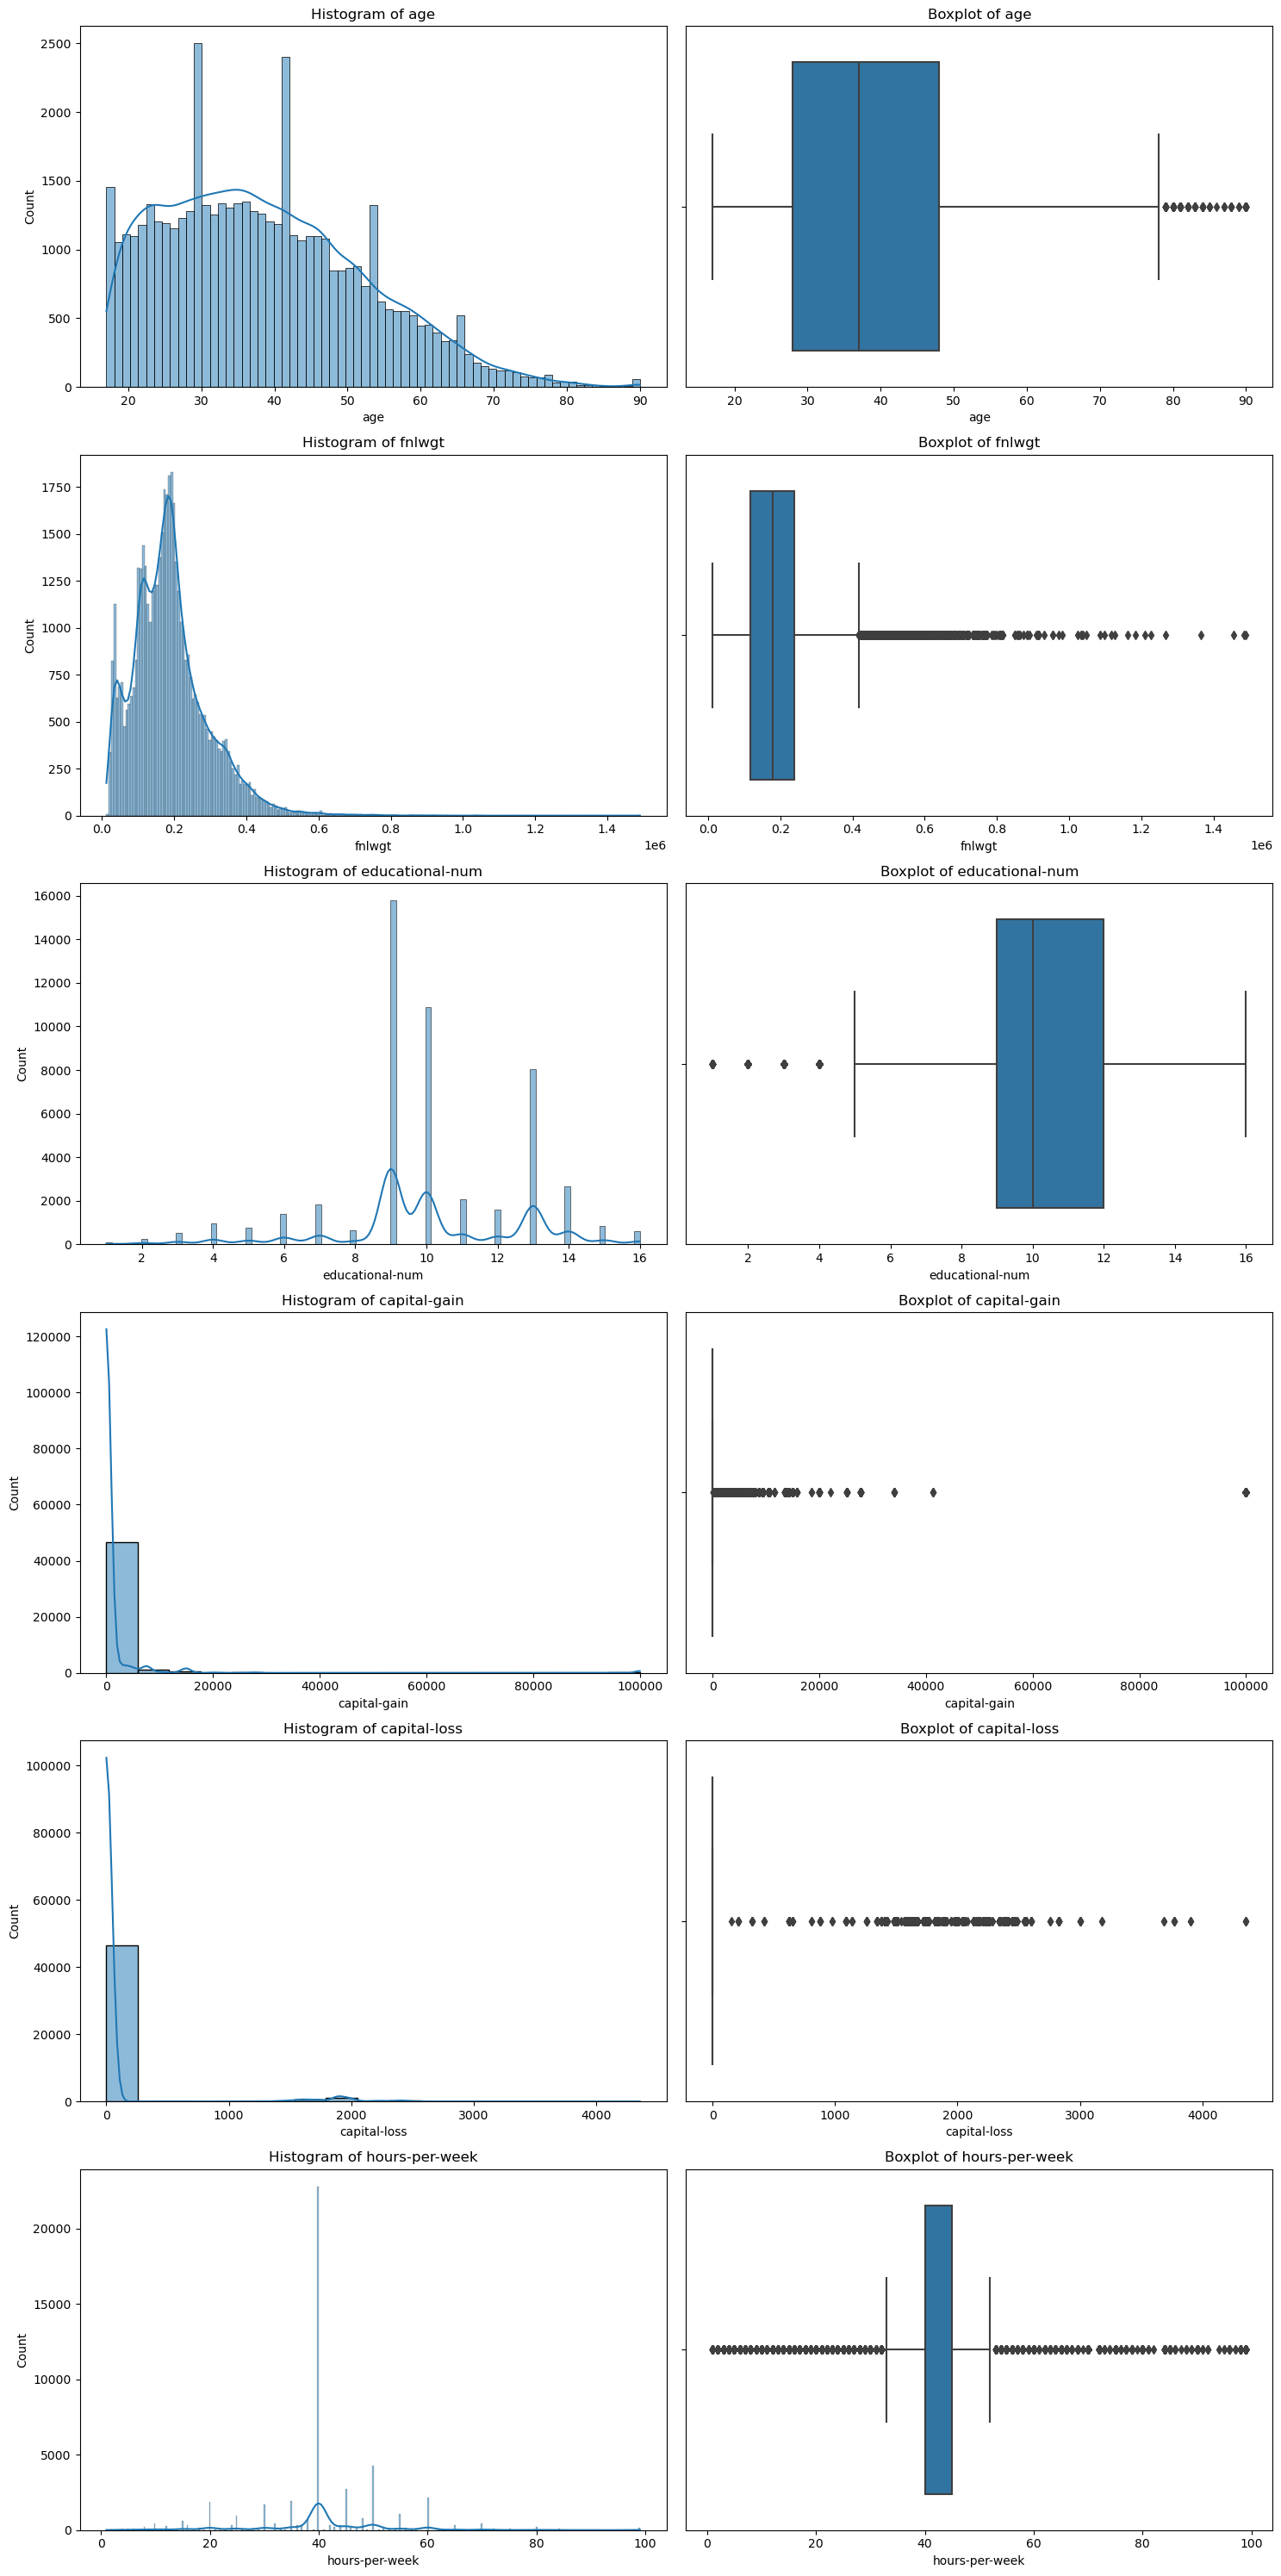

In [299]:
numerical_features = list(df.select_dtypes(exclude=['object']).columns)
numerical_num_features = len(numerical_features)
fig, axes = plt.subplots(numerical_num_features, 2, figsize=(15, 5 * numerical_num_features))

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {feature}')
    sns.boxplot(data=df, x=feature, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

### Objectives for Exploratory Data Analysis (EDA)
2. **Univariate Analysis**:
    - Plot bar charts for categorical features.

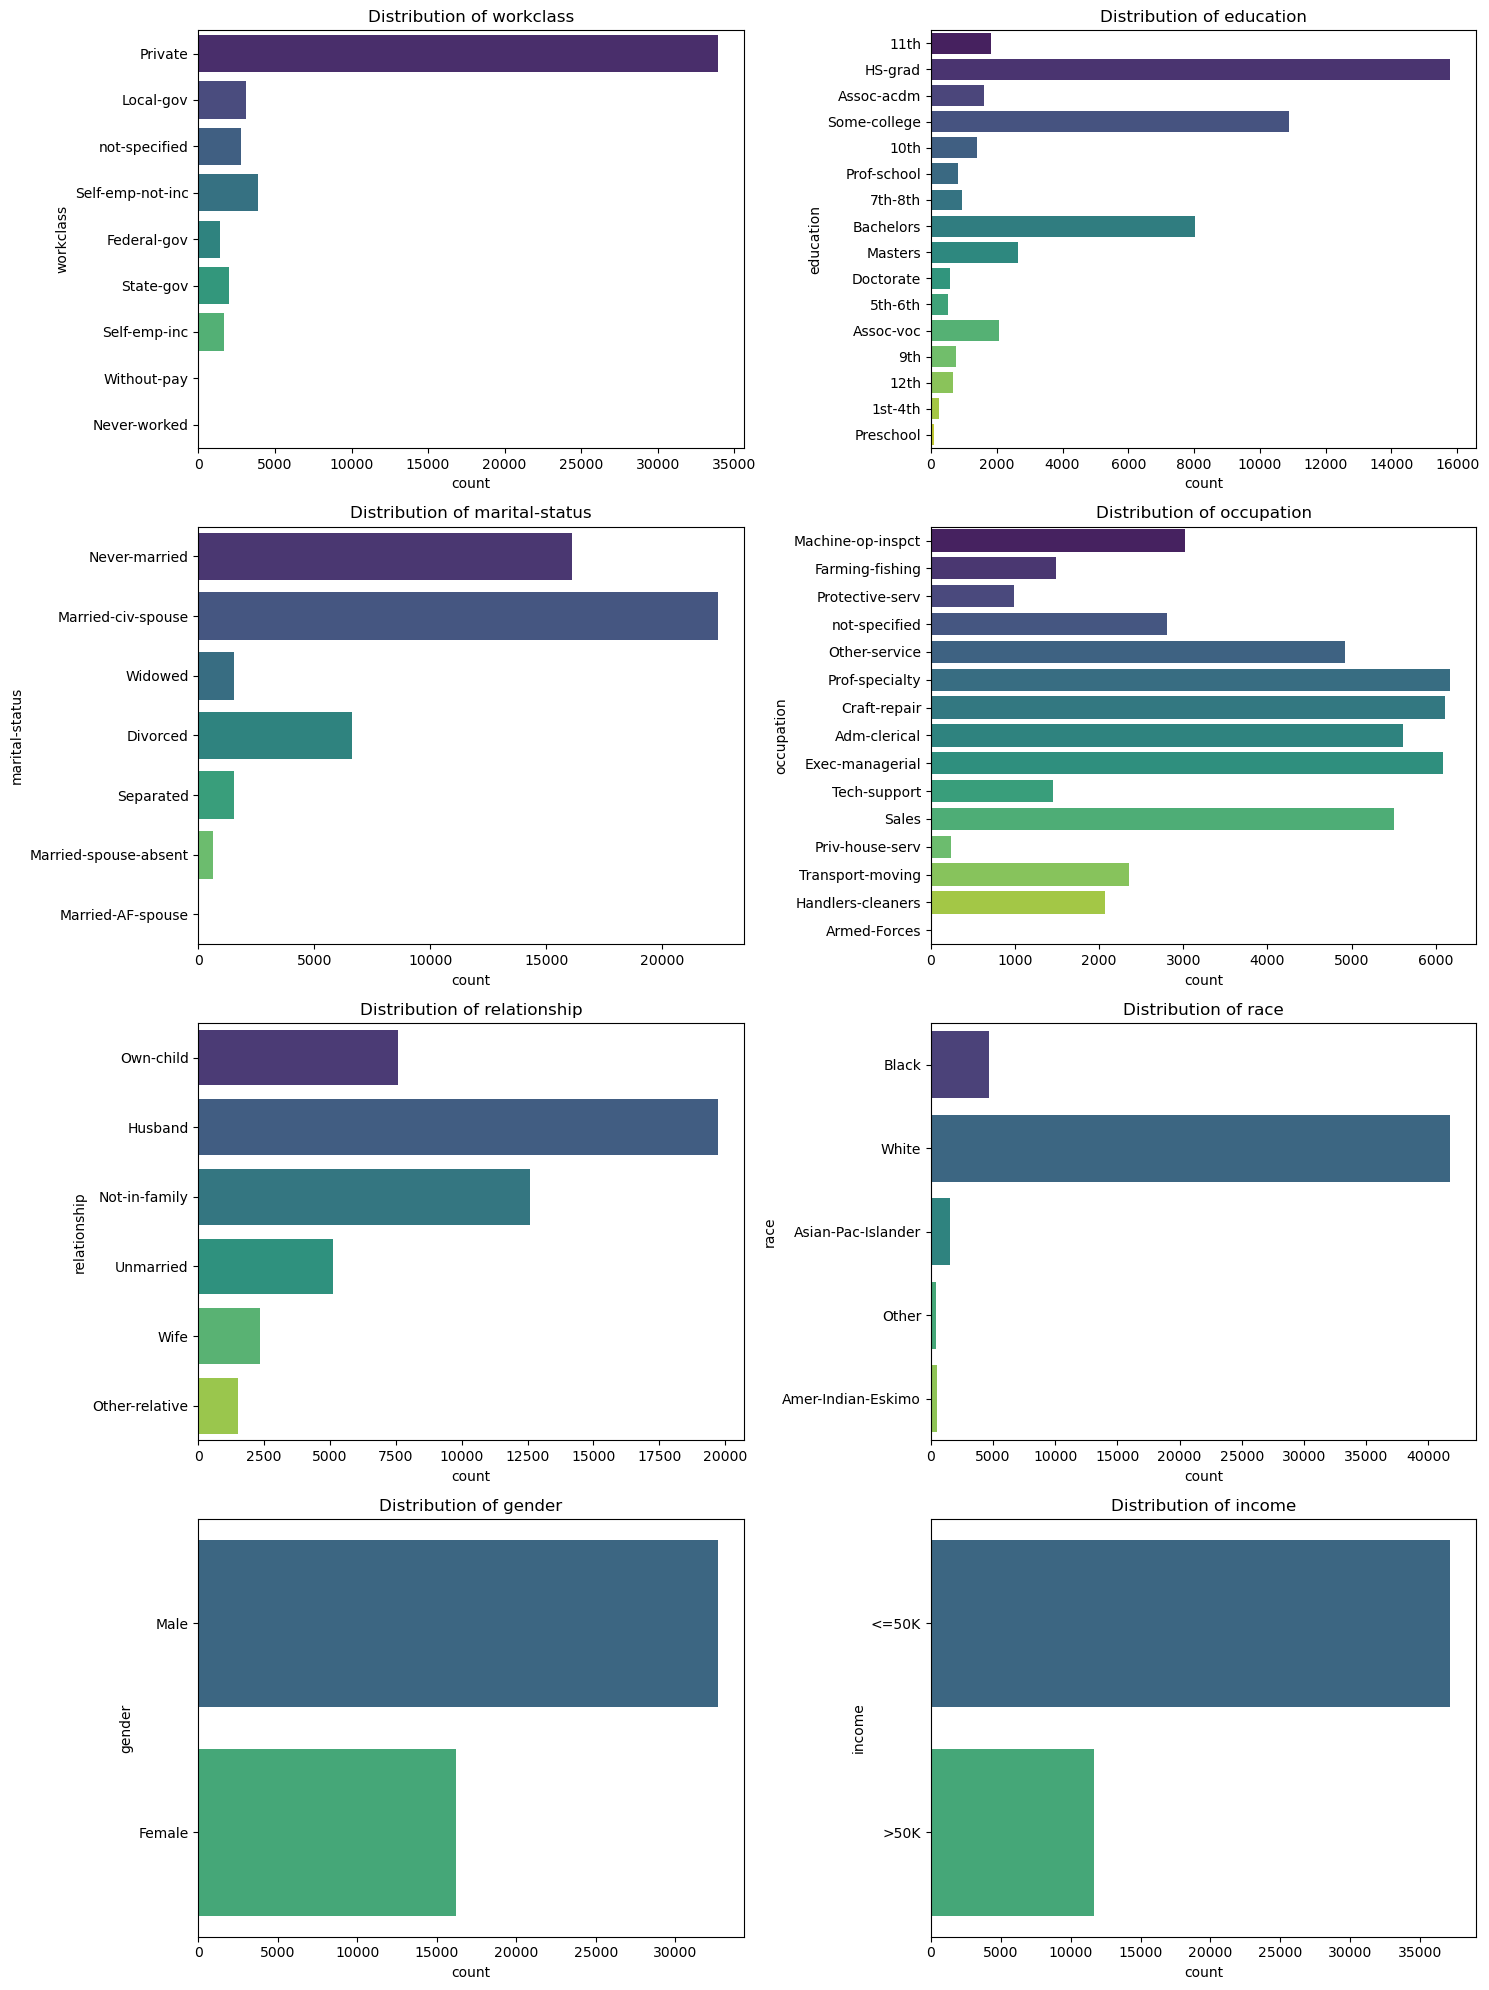

In [300]:
non_numeric_columns = df.select_dtypes(include=['object'])
non_numeric_columns['occupation'].replace('?', 'not-specified', inplace=True)
non_numeric_columns['workclass'].replace('?', 'not-specified', inplace=True)
non_numeric_columns_names = list(non_numeric_columns.columns)
non_numeric_columns_names.remove('native-country')
non_numeric_columns_names_len = len(non_numeric_columns_names)

nrows = (non_numeric_columns_names_len + 1) // 2

fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 5 * nrows))

axes = axes.flatten()

for i, col_name in enumerate(non_numeric_columns_names):
    sns.countplot(data=non_numeric_columns, y=col_name, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col_name}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Objectives for Exploratory Data Analysis (EDA)
3. **Bivariate Analysis**:
    - Create boxplots and violin plots for numerical features against `income`.

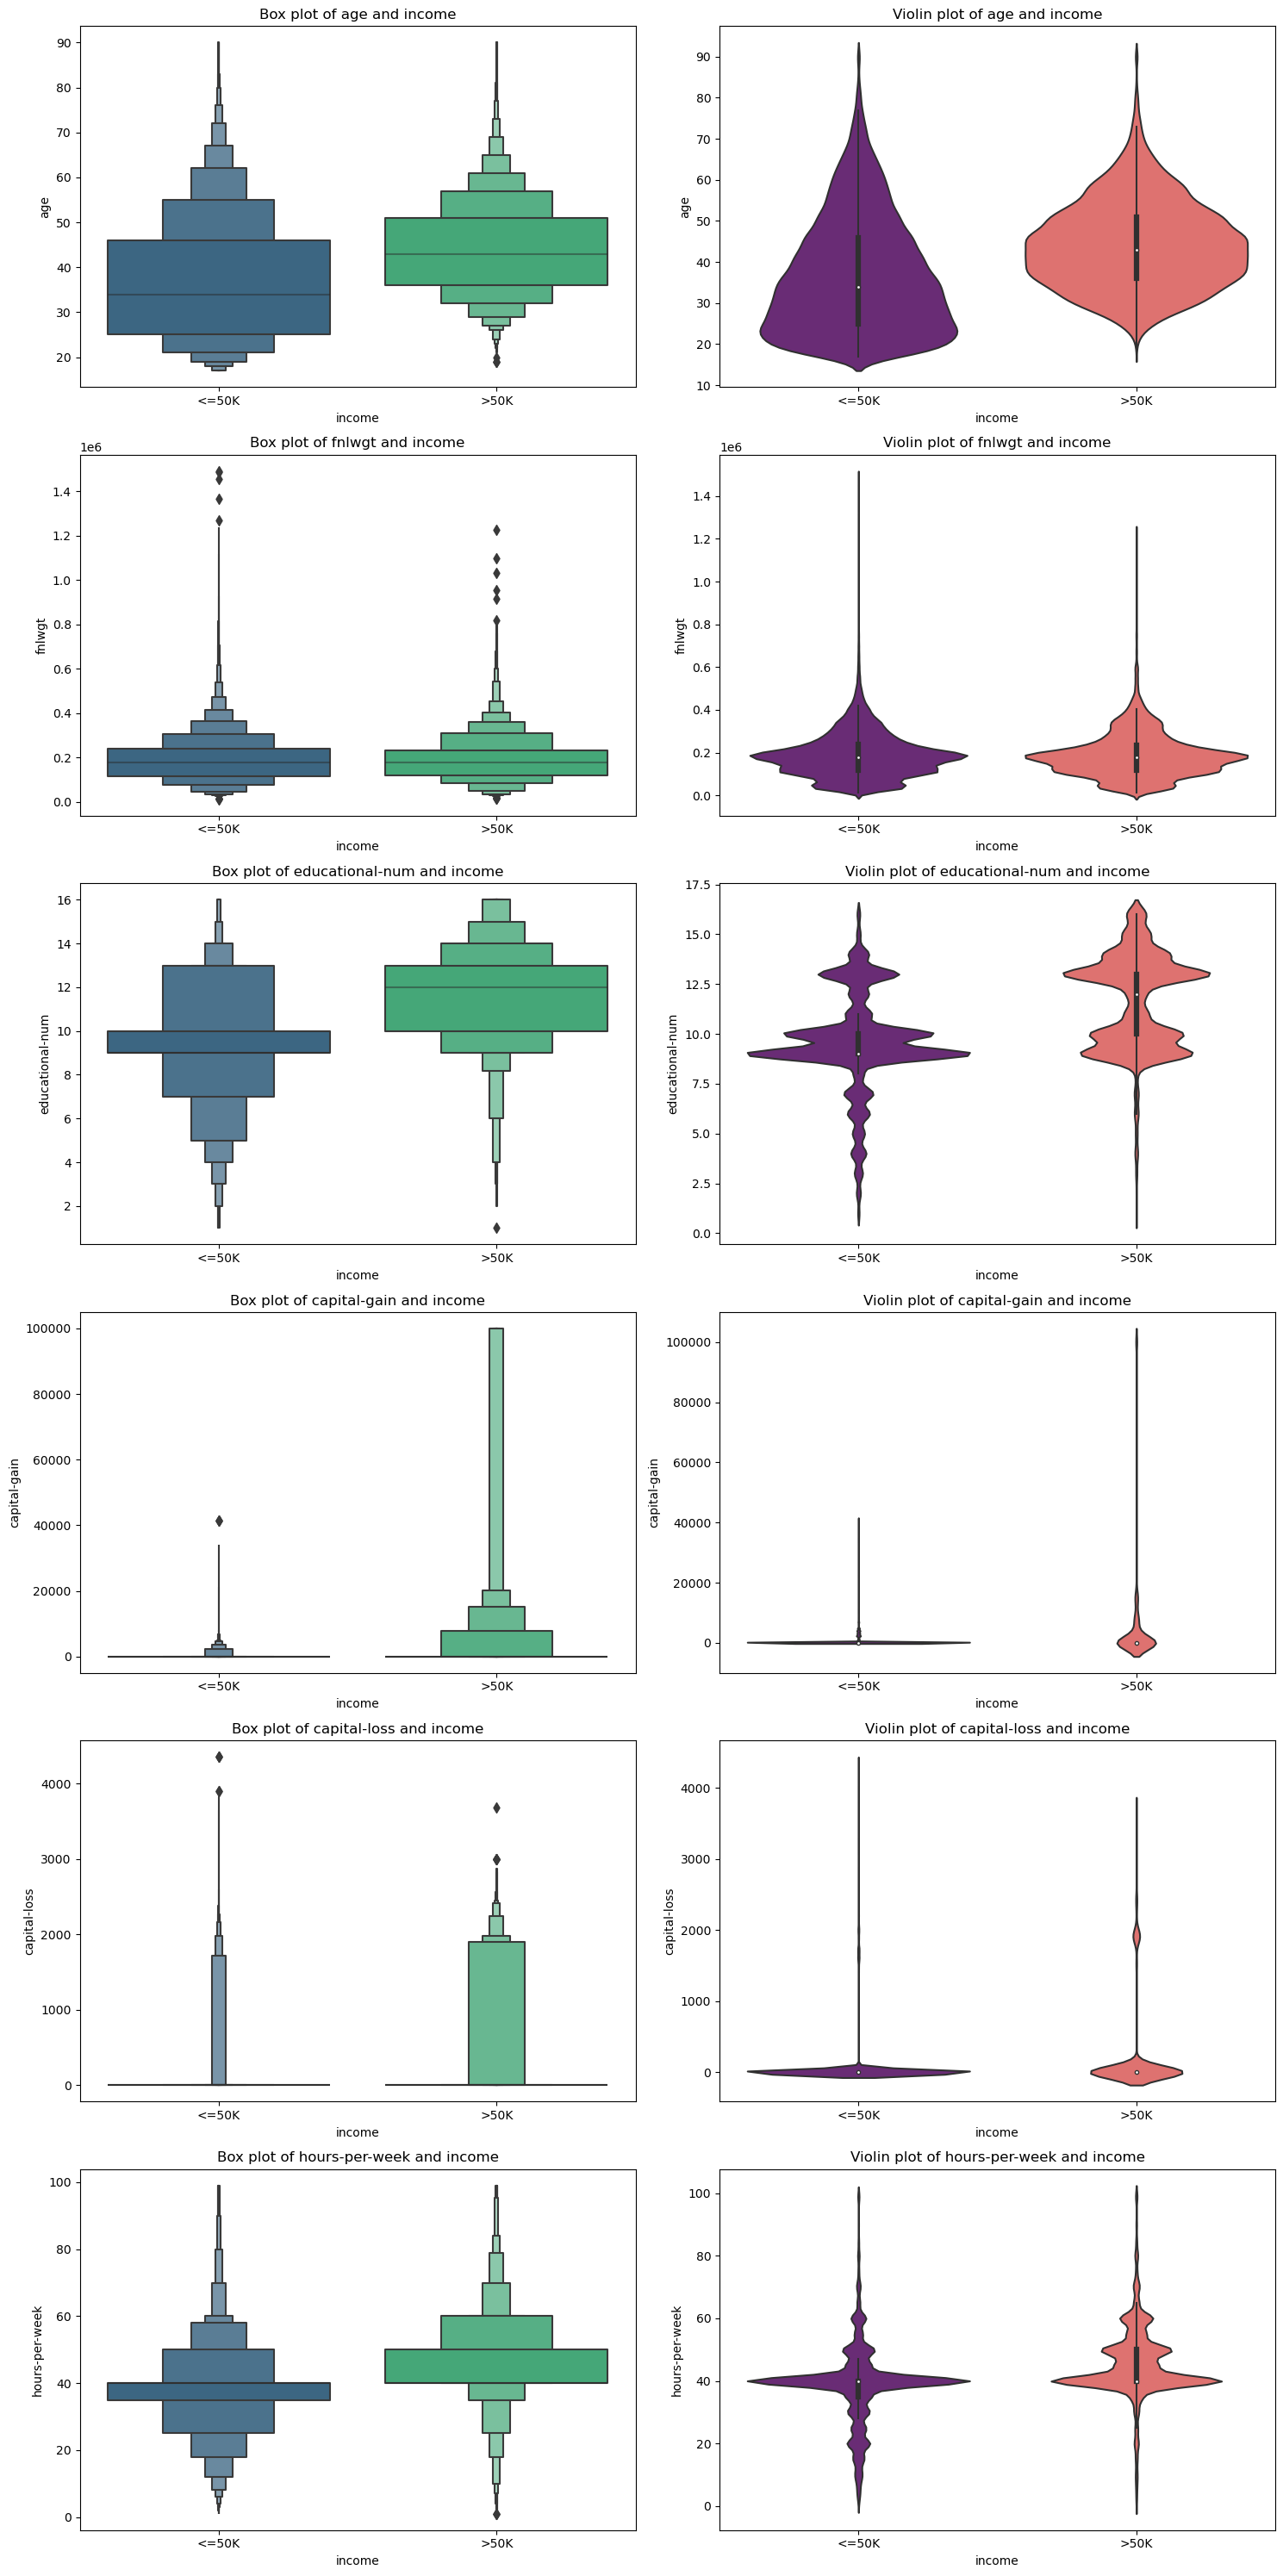

In [301]:
fig, axes = plt.subplots(nrows = numerical_num_features, ncols=2, figsize=(15, 5 * numerical_num_features))

for i, col_name in enumerate(numerical_features):
    sns.boxenplot(data=df, y=col_name, x='income', ax=axes[i, 0], palette='viridis')
    axes[i, 0].set_title(f'Box plot of {col_name} and income')
    sns.violinplot(data=df, y=col_name, x='income', ax=axes[i, 1], palette='magma')  # Use violinplot here
    axes[i, 1].set_title(f'Violin plot of {col_name} and income')

    
plt.tight_layout()
plt.show()

### Objectives for Exploratory Data Analysis (EDA)
3. **Bivariate Analysis**:
    - Create bar plots and count plots for categorical features against `income`.

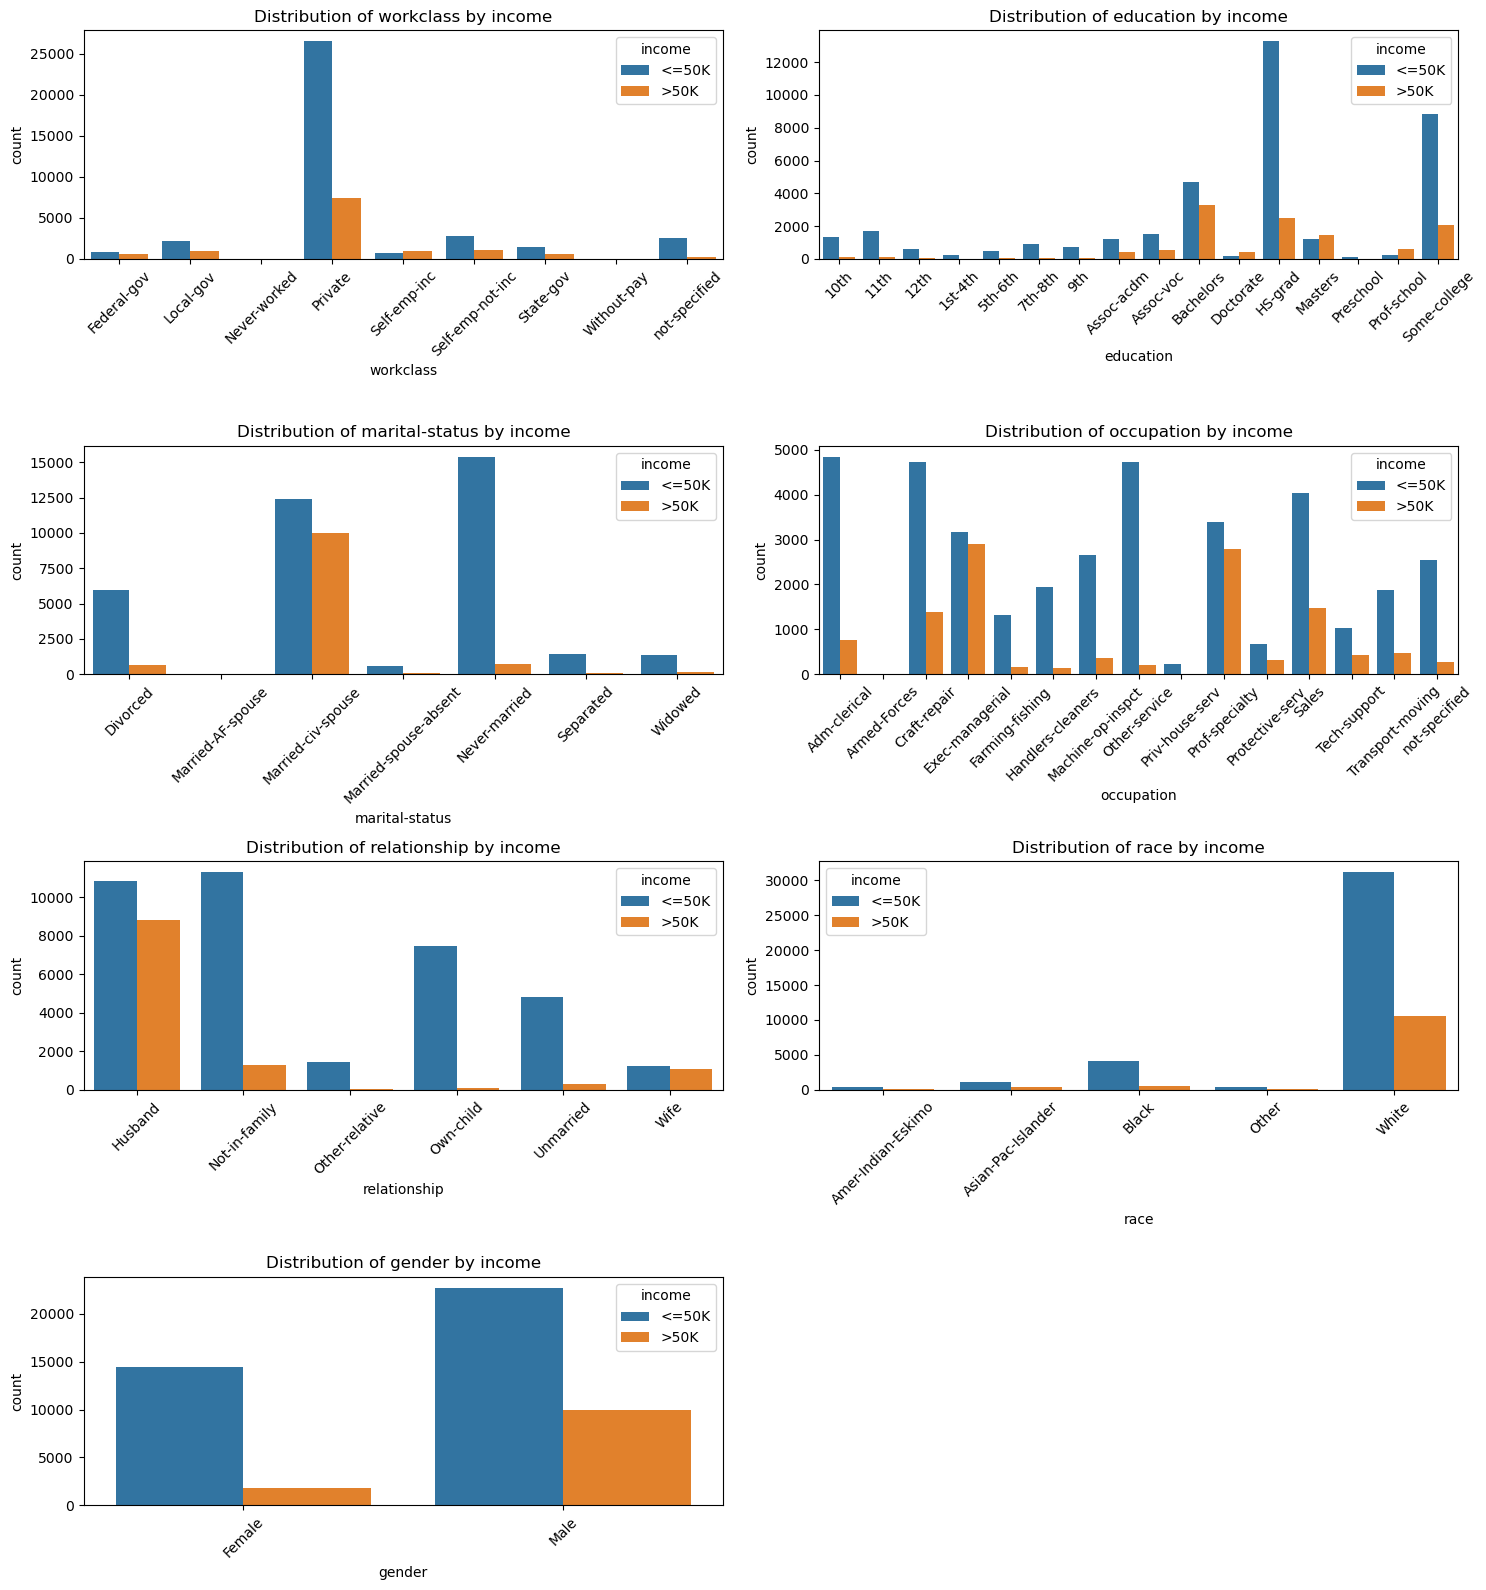

In [302]:
non_numeric_columns_names_copy = list(non_numeric_columns_names)
non_numeric_columns_names_copy.remove('income')

fig, axes = plt.subplots(nrows=(non_numeric_columns_names_len + 1) // 2, ncols=2, figsize=(15, 4 * non_numeric_columns_names_len // 2))
axes = axes.flatten()

for i, col_name in enumerate(non_numeric_columns_names_copy):
    agg_data = non_numeric_columns.groupby(by=['income', col_name]).size().reset_index(name='count')
    
    sns.barplot(data=agg_data, x=col_name, y='count', hue='income', ax=axes[i])
    axes[i].set_title(f'Distribution of {col_name} by income')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

### Objectives for Exploratory Data Analysis (EDA)
4. **Multivariate Analysis**:
    - Use pair plots or correlation heatmaps for numerical features.

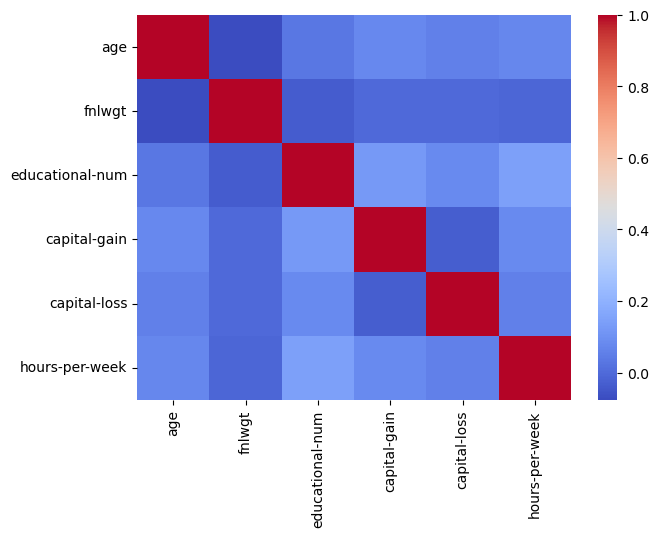

In [303]:
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

### Objectives for Exploratory Data Analysis (EDA)
4. **Multivariate Analysis**:
    - Analyze interactions between categorical features and the target variable.

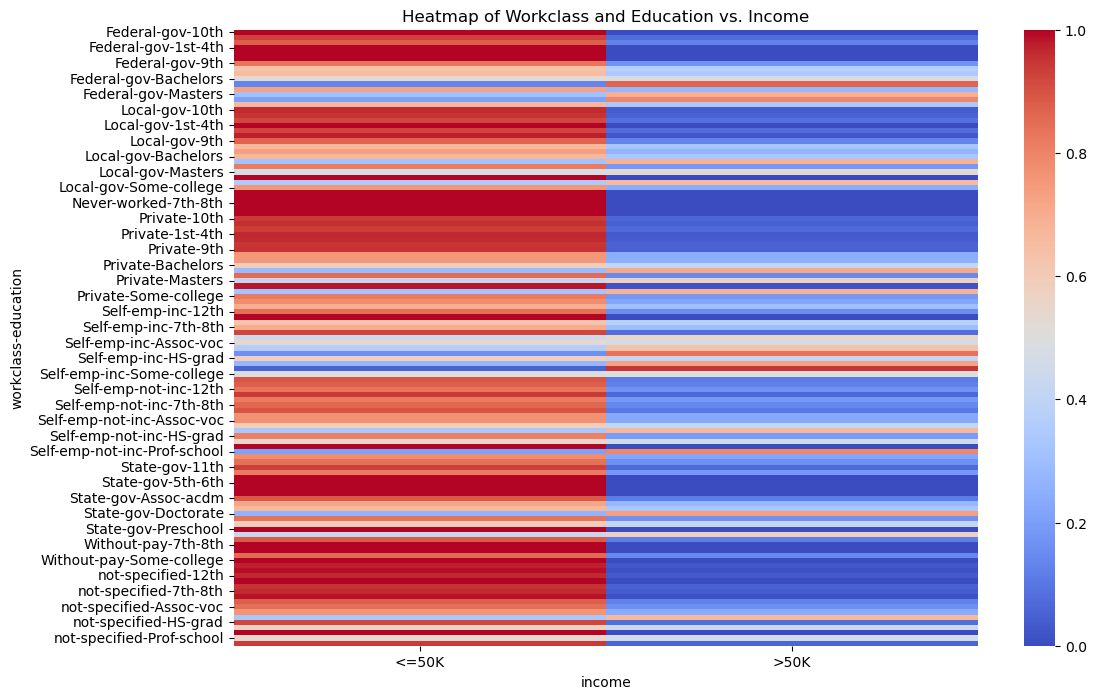

In [304]:
crosstab = pd.crosstab([df['workclass'], df['education']], df['income'], normalize='index')
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Workclass and Education vs. Income')
plt.show()

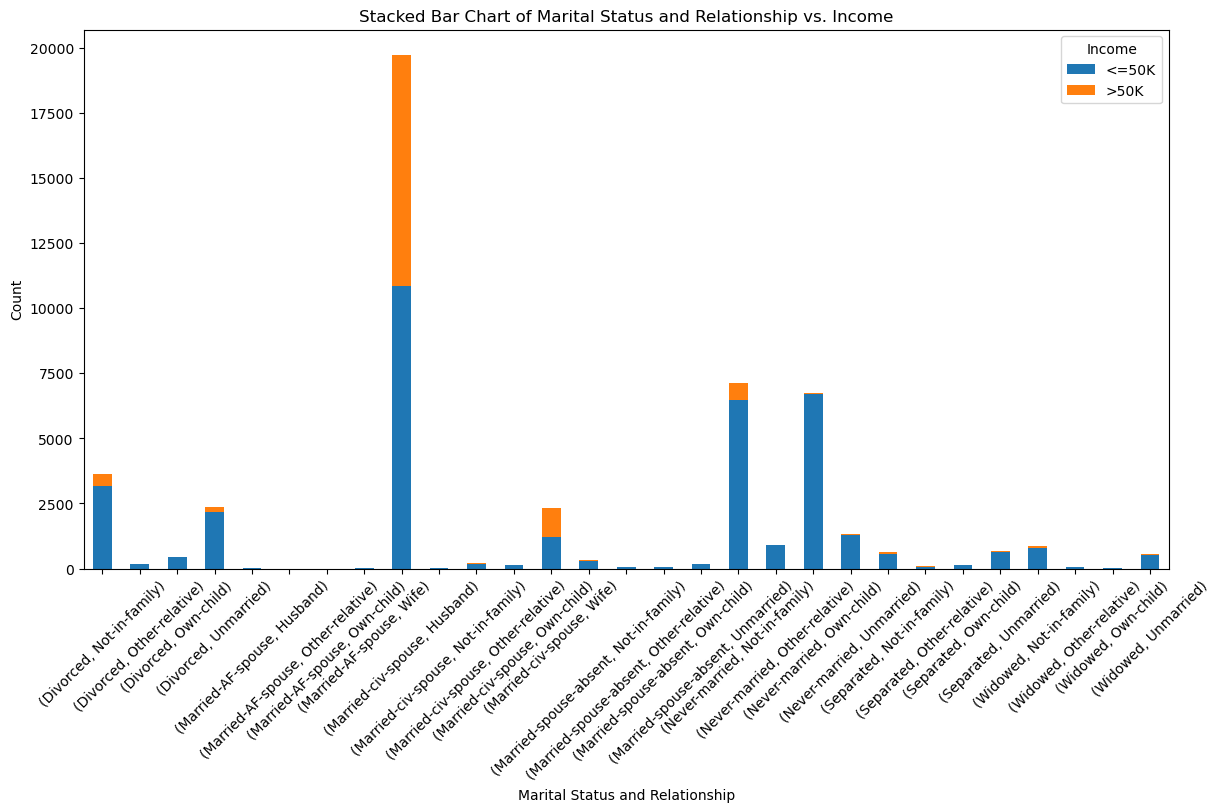

In [305]:
df.groupby(['marital-status', 'relationship', 'income']).size().unstack().plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Stacked Bar Chart of Marital Status and Relationship vs. Income')
plt.xlabel('Marital Status and Relationship')
plt.ylabel('Count')
plt.legend(title='Income')
plt.xticks(rotation=45)
plt.show()

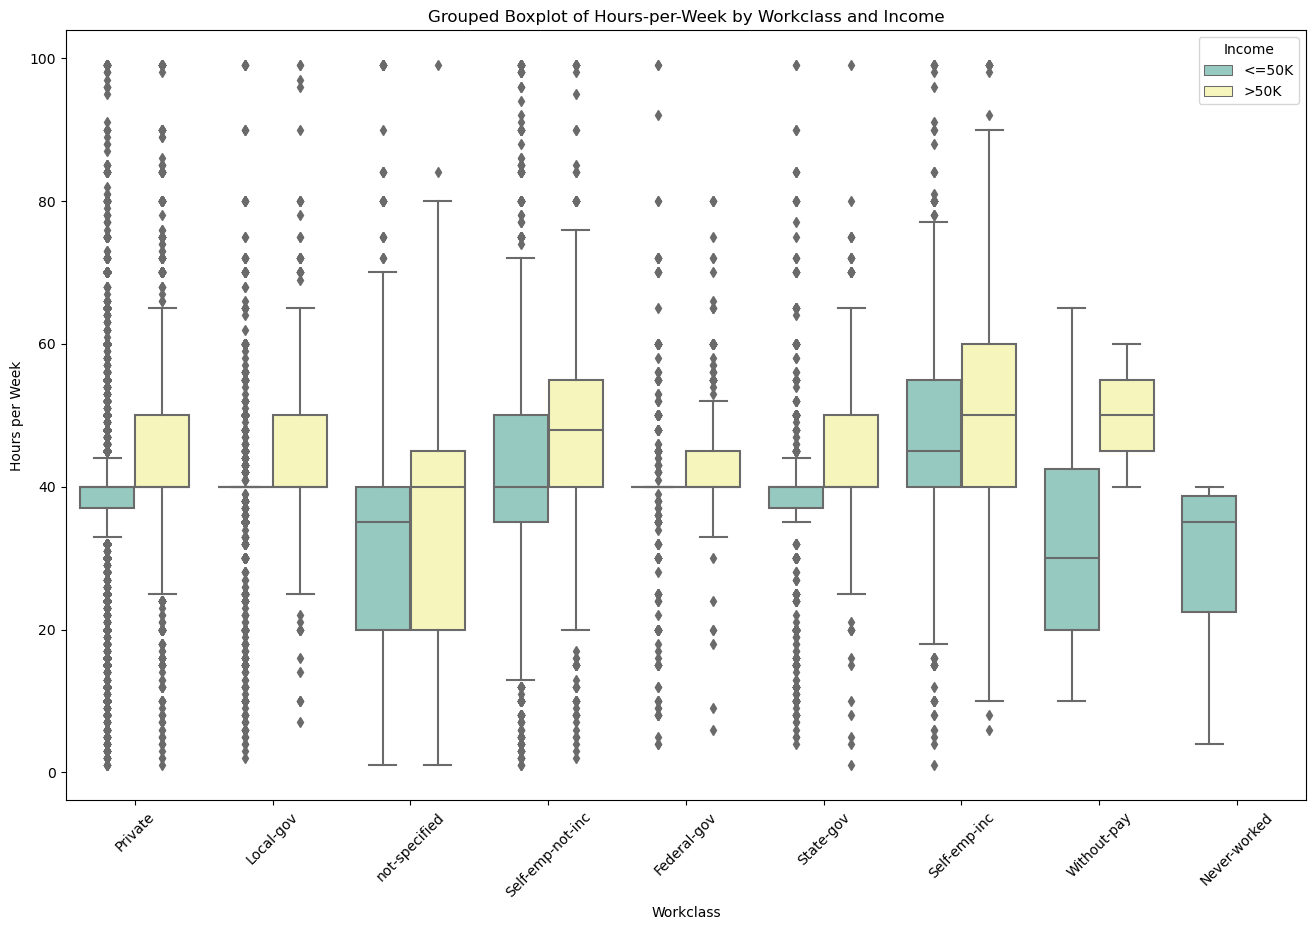

In [306]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='workclass', y='hours-per-week', hue='income', data=df, palette='Set3')
plt.title('Grouped Boxplot of Hours-per-Week by Workclass and Income')
plt.xlabel('Workclass')
plt.ylabel('Hours per Week')
plt.legend(title='Income')
plt.xticks(rotation=45)
plt.show()

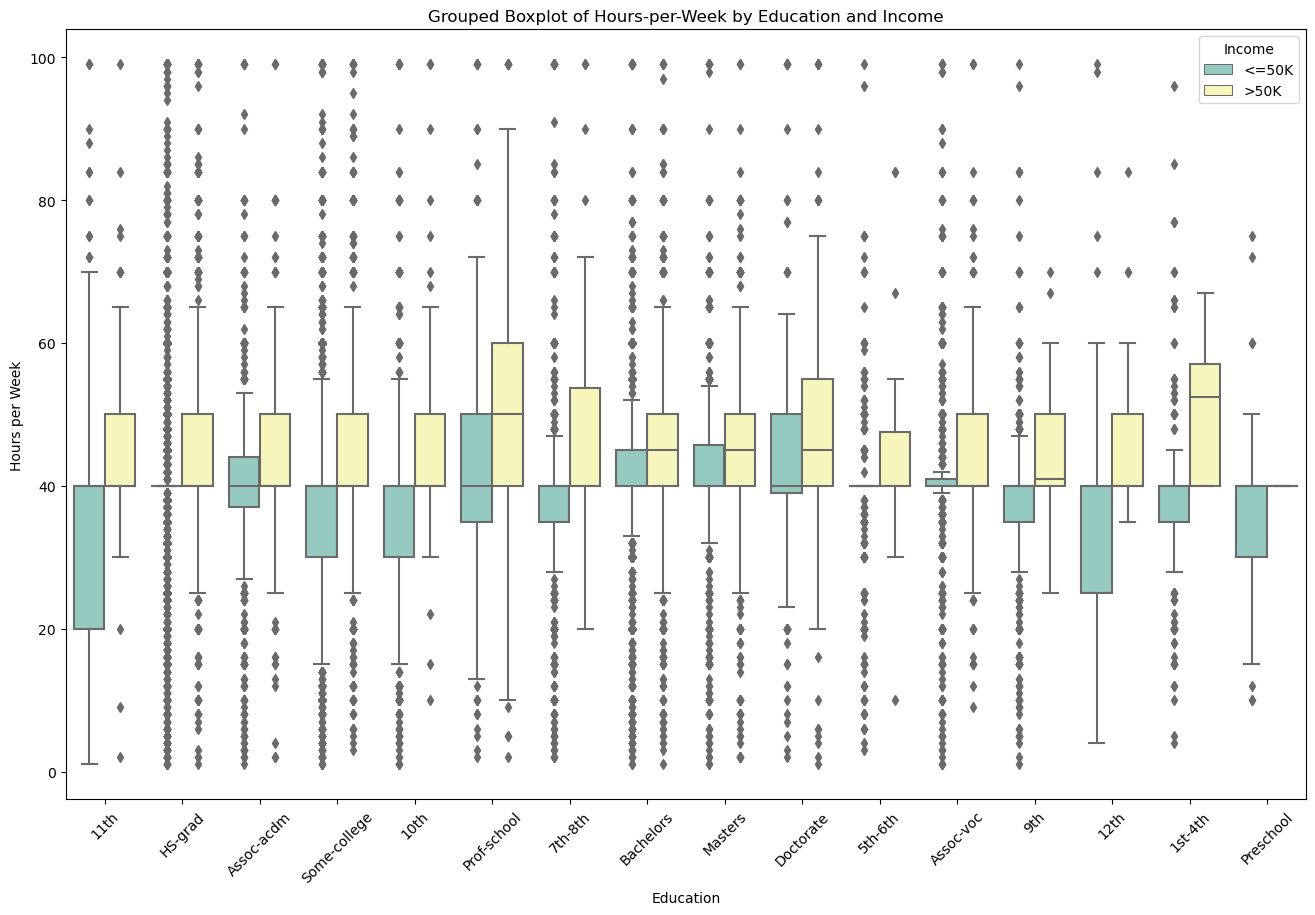

In [307]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='education', y='hours-per-week', hue='income', data=df, palette='Set3')
plt.title('Grouped Boxplot of Hours-per-Week by Education and Income')
plt.xlabel('Education')
plt.ylabel('Hours per Week')
plt.legend(title='Income')
plt.xticks(rotation=45)
plt.show()

### EDA Objectives
5. **Feature Engineering**:
    - Explore the creation of new features that may better capture the information in the data.
        - Combining all graduate value of lower than high school degree to non-graduate
        - Removing Duplicates
        - Converting age column to labaled-age column
        - Removing unneccessary columns
        - One-Hot Encoding of categorical features
        - Label Encoding of `income` column

#### Combining all graduate value of lower than high school degree to non-graduate

In [308]:
non_graduated_values = ['11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']

def replace_non_graduate_values(education_level):
    if education_level in non_graduated_values:
        return 'non-graduate'
    return education_level

df['education'] = df['education'].apply(replace_non_graduate_values)

#### Removing Duplicates

In [309]:
duplicated_number = df.duplicated().sum()
if duplicated_number > 0:
    df.drop_duplicates(inplace=True)
    print(f'{duplicated_number} duplicated rows were removed!')
    

52 duplicated rows were removed!


#### Converting age column to labaled-age column

In [310]:
df['age_bin'] = pd.cut(df['age'], bins=[0, 25, 50, 75, 100], labels=['young', 'middle-aged', 'senior', 'elderly'])
df.drop(columns=['age'], inplace=True)

#### Removing unneccessary columns

In [311]:
df.drop(columns=['educational-num', 'fnlwgt'], inplace=True)

In [312]:
df.head(1)

,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bin
0,Private,non-graduate,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,young


#### One-Hot Encoding the categorical features

In [313]:
encoded_columns_names = list(df.select_dtypes(include=['object', 'category']))
if 'income' in encoded_columns_names:
    encoded_columns_names.remove('income')
encoded_columns_names

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'age_bin']

In [314]:
df_one_hot_encoded = pd.get_dummies(df, columns=encoded_columns_names, dtype='int16')
df_one_hot_encoded.head(2)

,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_not-specified,age_bin_young,age_bin_middle-aged,age_bin_senior,age_bin_elderly
0,0,0,40,<=50K,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,50,<=50K,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [315]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_one_hot_encoded['income'] = label_encoder.fit_transform(df_one_hot_encoded['income'])
dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

{'<=50K': 0, '>50K': 1}

In [316]:
df_one_hot_encoded.head(1)

,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_not-specified,age_bin_young,age_bin_middle-aged,age_bin_senior,age_bin_elderly
0,0,0,40,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [317]:
X = df_one_hot_encoded.copy()
X.drop(columns=['income'], inplace=True)
y = df_one_hot_encoded['income'].values

# <center>Principal Component Analysis (PCA)</center>

### Objectives for Principal Component Analysis (PCA)
1. **Standardization**:
    - Apply standardization to ensure all features contribute equally to the PCA.

In [318]:
from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler()
X = std_scalar.fit_transform(X)

### Objectives for Principal Component Analysis (PCA)
2. **PCA Implementation**:
    - Determine the number of principal components to retain by analyzing the explained variance ratio.

In [319]:
from sklearn.decomposition import PCA

n_components = list(range(1, 90, 5))
explained_variance = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(X)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

### Objectives for Principal Component Analysis (PCA)
3. **Visualization**: Visualize the results of the PCA.
    - Plot the explained variance ratio for each principal component.
    - Create scatter plots of the first two or three principal components to visualize the data in reduced dimensions.

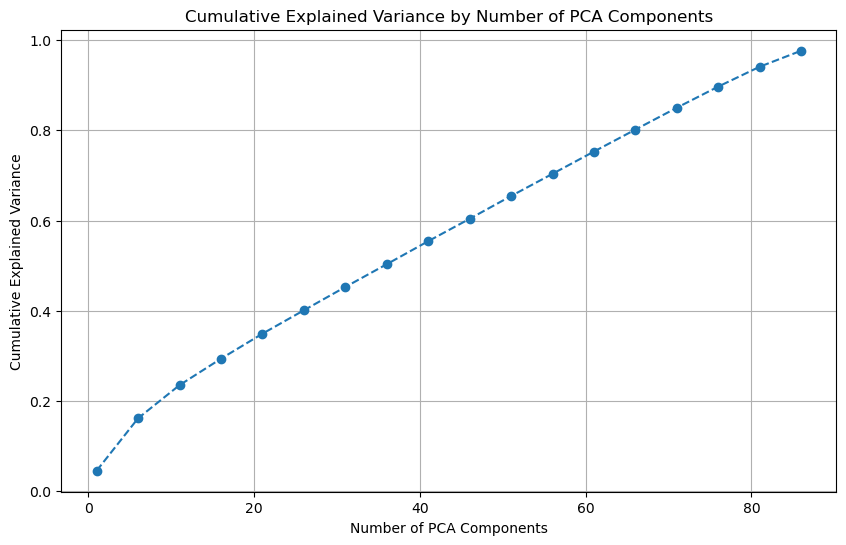

In [320]:
plt.figure(figsize=(10, 6))
plt.plot(n_components, explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of PCA Components')
plt.grid()
plt.show()

### Objectives for Principal Component Analysis (PCA)
4. **Interpretation**: Interpret the principal components.
    - Analyze the loadings of the original features on the principal components to understand what each principal component represents.

#### PCA Analysis Insights

We performed PCA on our dataset, which originally contains 103 columns, to explore the potential benefits of dimensionality reduction. Below are the cumulative explained variance ratios for selected numbers of components:

| Number of Components | Cumulative Explained Variance |
|----------------------|-------------------------------|
| 1                    | 0.0475                        |
| 6                    | 0.1635                         |
| 16                   | 0.2963                        |
| 21                   | 0.3492                         |
| 31                   | 0.4524                        |
| 36                   | 0.5036                         |
| 46                   | 0.6022                          |
| 61                   | 0.7501                        |
| 66                   | 0.7983                         |
| 76                   | 0.8927                        |
| 81                   | 0.9365                        |
| 86                   | 0.9716     #                   |

### Analysis and Conclusion

From the analysis, we observe the following key points:

1. **Initial Increase**: The first few components provide a significant increase in explained variance. However, the rate of increase slows down considerably as more components are added.
2. **Diminishing Returns**: After approximately 31 components, the additional explained variance for each new component becomes quite small.
3. **High Component Count**: To capture around 90% of the variance, we need approximately 76 components. This means we would still have a high-dimensional dataset even after PCA.

Given these observations, we conclude that performing PCA on this dataset is not particularly beneficial. The reduction in dimensionality (from 103 to around 76 components to retain 90% variance) is not substantial enough to justify the computational cost and complexity introduced by the PCA transformation. Therefore, PCA may not be worth pursuing for this dataset in terms# of dimensionality reduction.

### Decision

Considering the minimal reduction in dimensions relative to the original number of features and the computational resources required, we decided not to proceed with PCA for this dataset. Instead, we will explore other methods for feature selection or engineering that might be more effective and computationally efficient.


# <center>Classification Model</center>

### Objectives for Classification Model
1. **Data Preparation**: Prepare the data for modeling.
    - Split the data into training and testing sets.

In [321]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Objectives for Classification Model
2. **Model Selection**: Choose appropriate classification algorithms.
    - Explore various models such as Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines.

<i>Based on the data set shape and data type, also our computational resource and demand of model to be interpretable we choose Logistic Regression model</i>

In [322]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(solver='liblinear')

### Objectives for Classification Model
3. **Model Training**: Train the selected models on the training data.
    - Use cross-validation to tune hyperparameters and prevent overfitting.

In [323]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']        # Type of regularization
}
grid_search = GridSearchCV(logistic_regression_model,
                           param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_

### Objectives for Classification Model
4. **Model Evaluation**: Evaluate the performance of the models.
    - Use metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

### Model Evaluation: Logistic Regression

#### Best Logistic Regression Model:
- **Model**: Logistic Regression
- **Hyperparameters**: C=0.1, penalty='l1', solver='liblinear'

#### Performance Metrics:

1. **Accuracy**: 0.8518
   - The model correctly predicts the target variable for 85.18% of the instances in the test set.

2. **Classification Report**:
   - **Class 0 (Negative Class)**:
     - **Precision**: 0.88
       - 88% of the instances predicted as class 0 are actually class 0.
     - **Recall**: 0.93
       - 93% of the actual class 0 instances are correctly predicted by the model.
     - **F1-Score**: 0.91
       - The harmonic mean of precision and recall for class 0.
   - **Class 1 (Positive Class)**:
     - **Precision**: 0.74
       - 74% of the instances predicted as class 1 are actually class 1.
     - **Recall**: 0.59
       - 59% of the actual class 1 instances are correctly predicted by the model.
     - **F1-Score**: 0.65
       - The harmonic mean of precision and recall for class 1.
   - **Macro Average**:
     - **Precision**: 0.81
       - Average precision across both classes.
     - **Recall**: 0.76
       - Average recall across both classes.
     - **F1-Score**: 0.78
       - Average F1-score across both classes.
   - **Weighted Average**:
     - **Precision**: 0.84
       - Precision weighted by the number of true instances for each class.
     - **Recall**: 0.85
       - Recall weighted by the number of true instances for each class.
     - **F1-Score**: 0.85
       - F1-score weighted by the number of true instances for each class.

3. **ROC-AUC**: 0.9063
   - The ROC-AUC score is 0.9063, indicating that the model has a good ability to distinguish between the positive and negative classes. 

#### Insights:

- The Logistic Regression model with `C=0.1` and `l1` penalty achieves an accuracy of 85.18%, which is a strong performance given the complexity of the dataset.
- The model performs well in predicting the negative class (Class 0) with high precision (0.88) and recall (0.93), resulting in a high F1-score (0.91).
- However, the model has lower performance in predicting the positive class (Class 1), with a precision of 0.74 and recall of 0.59, leading to a moderate F1-score of 0.65. This indicates that while the model is good at identifying true positives, it misses a notable number of them.
- The weighted averages of precision, recall, and F1-score are all above 0.84, reflecting that the model maintains good overall performance across classes.
- The ROC-AUC score of 0.9063 further confirms that the model has a strong discriminatory power between the two classes.

Overall, the Logistic Regression model demonstrates good performance, but there is room for improvement in predicting the positive class. Additional techniques such as balancing the dataset, feature engineering, or using more complex models might help in improving the recall and F1-score for the positive class.


In [324]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

best_log_reg.fit(X_train, y_train)

y_pred = best_log_reg.predict(X_test)
y_prob = best_log_reg.predict_proba(X_test)[:, 1]

print(f"Best Logistic Regression Model: {best_log_reg}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob)}")

Best Logistic Regression Model: LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Accuracy: 0.8518138962902234
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7440
           1       0.74      0.59      0.65      2318

    accuracy                           0.85      9758
   macro avg       0.81      0.76      0.78      9758
weighted avg       0.84      0.85      0.85      9758

ROC-AUC: 0.9063104780724949


### Objectives for Classification Model
4. **Model Evaluation**: Evaluate the performance of the models.
    - Compare the performance of different models and select the best one.

### Model Comparison Insights

In this section, we compare the performance of various classification models trained on our dataset, including Decision Tree, Random Forest, Support Vector Machine (SVM), and Logistic Regression. We assess each model based on their accuracy, precision, recall, F1-score, and ROC-AUC.

#### Decision Tree:
- **Accuracy**: 0.8351
- **Classification Report**:
  - **Class 0 (Negative Class)**:
    - Precision: 0.88
    - Recall: 0.91
    - F1-Score: 0.89
  - **Class 1 (Positive Class)**:
    - Precision: 0.67
    - Recall: 0.61
    - F1-Score: 0.64
- **ROC-AUC**: 0.8247

#### Random Forest:
- **Accuracy**: 0.8502
- **Classification Report**:
  - **Class 0 (Negative Class)**:
    - Precision: 0.89
    - Recall: 0.92
    - F1-Score: 0.90
  - **Class 1 (Positive Class)**:
    - Precision: 0.71
    - Recall: 0.62
    - F1-Score: 0.66
- **ROC-AUC**: 0.8911

#### Support Vector Machine:
- **Accuracy**: 0.8499
- **Classification Report**:
  - **Class 0 (Negative Class)**:
    - Precision: 0.87
    - Recall: 0.94
    - F1-Score: 0.91
  - **Class 1 (Positive Class)**:
    - Precision: 0.75
    - Recall: 0.56
    - F1-Score: 0.64
- **ROC-AUC**: 0.8890

#### Logistic Regression:
- **Accuracy**: 0.8518
- **Classification Report**:
  - **Class 0 (Negative Class)**:
    - Precision: 0.88
    - Recall: 0.93
    - F1-Score: 0.91
  - **Class 1 (Positive Class)**:
    - Precision: 0.74
    - Recall: 0.59
    - F1-Score: 0.65
- **ROC-AUC**: 0.9063

### Insights:

- **Accuracy**:
  - The Logistic Regression model achieves the highest accuracy (0.8518), closely followed by the Random Forest (0.8502) and SVM (0.8499).
  - The Decision Tree model has the lowest accuracy (0.8351).

- **Precision, Recall, and F1-Score**:
  - For Class 0, all models show high precision and recall, with Logistic Regression, Random Forest, and SVM having very similar performance.
  - For Class 1, Logistic Regression has a relatively high precision (0.74) compared to Random Forest (0.71) and Decision Tree (0.67). However, Logistic Regression and SVM (0.75) show slightly better precision than Random Forest.
  - Recall for Class 1 is a challenge across all models, with Random Forest and Logistic Regression performing better (0.62 and 0.59 respectively) compared to Decision Tree (0.61) and SVM (0.56).

- **ROC-AUC**:
  - Logistic Regression achieves the highest ROC-AUC (0.9063), indicating it has the best overall ability to distinguish between the classes.
  - Random Forest and SVM follow with ROC-AUC scores of 0.8911 and 0.8890, respectively.
  - Decision Tree has the lowest ROC-AUC score (0.8247).

### Conclusion:
The Logistic Regression model stands out with the highest accuracy and ROC-AUC, suggesting it performs best in terms of overall classification capability. While Random Forest and SVM also show strong performance, Logistic Regression is slightly ahead in terms of precision and recall for Class 1, and significantly better in ROC-AUC, making it the preferred choice for this dataset.


In [325]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob)}")
    print("-" * 50)

Decision Tree:
Accuracy: 0.8351096536175446
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7440
           1       0.67      0.61      0.64      2318

    accuracy                           0.84      9758
   macro avg       0.77      0.76      0.77      9758
weighted avg       0.83      0.84      0.83      9758

ROC-AUC: 0.8246976966146196
--------------------------------------------------
Random Forest:
Accuracy: 0.8501742160278746
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7440
           1       0.71      0.62      0.66      2318

    accuracy                           0.85      9758
   macro avg       0.80      0.77      0.78      9758
weighted avg       0.84      0.85      0.85      9758

ROC-AUC: 0.8910855437112083
--------------------------------------------------
Support Vector Machine:
Accuracy: 0.8498667759786842
C

### Objectives for Classification Model
5. **Model Interpretation**: Interpret the results of the classification model.
    - Analyze feature importances or coefficients to understand which features contribute most to the predictions.

## Insights from Logistic Regression Coefficients

The bar plot above displays the top 30 most important coefficients of the logistic regression model. Here are some key insights:

1. **Top Positive Influences**:
   - **Capital Gain**: This feature has the highest positive coefficient (2.34), indicating that higher capital gains significantly increase the likelihood of earning more than 50k.
   - **Marital Status - Married-civ-spouse**: With a coefficient of 0.97, being married to a civilian spouse is a strong positive indicator of higher income.
   - **Age (Young)**: Younger individuals (age_bin_young) have a significant negative impact (-0.60), implying that older age groups are more likely to earn over 50k.

2. **Negative Influences**:
   - **Education - Non-graduate**: The coefficient for non-graduate education is -0.41, indicating a substantial negative impact on earning potential.
   - **Gender - Female**: Being female has a negative coefficient of -0.33, suggesting gender disparity in income.
   - **Relationship - Own-child**: Having a relationship status of 'own-child' also negatively impacts income with a coefficient of -0.27.

3. **Occupation**:
   - **Occupation - Exec-managerial**: This occupation has a positive coefficient (0.26), suggesting managerial roles are associated with higher income.
   - **Occupation - Other-service**: This occupation has a negative coefficient (-0.22), indicating lower income levels.
   - **Various occupations** like "Prof-specialty", "Tech-support", and "Sales" have smaller positive influences, suggesting these roles are beneficial but to a lesser extent.

4. **Education**:
   - Higher education levels such as **Masters (0.23)** and **Doctorate (0.18)** have positive coefficients, indicating the significant positive impact of advanced degrees on income.
   - High school graduates also show a positive coefficient (0.18), reinforcing the value of completing high school.

5. **Workclass and Relationship**:
   - **Federal Government** and **Self-emp-not-inc** work classes have small positive influences.
   - Various relationship statuses, like "Wife" (0.25) and "Not-in-family" (0.09), show positive influences.

6. **Geographical Impact**:
   - Being from **Mexico** has a small negative coefficient (-0.09), indicating a slight disadvantage.

Overall, the coefficients provide a clear picture of which factors contribute most significantly to the likelihood of earning more than 50k. Positive coefficients indicate a higher likelihood, while negative coefficients indicate a lower likelihood. These insights can help in understanding the driving factors behind income levels in the dataset.


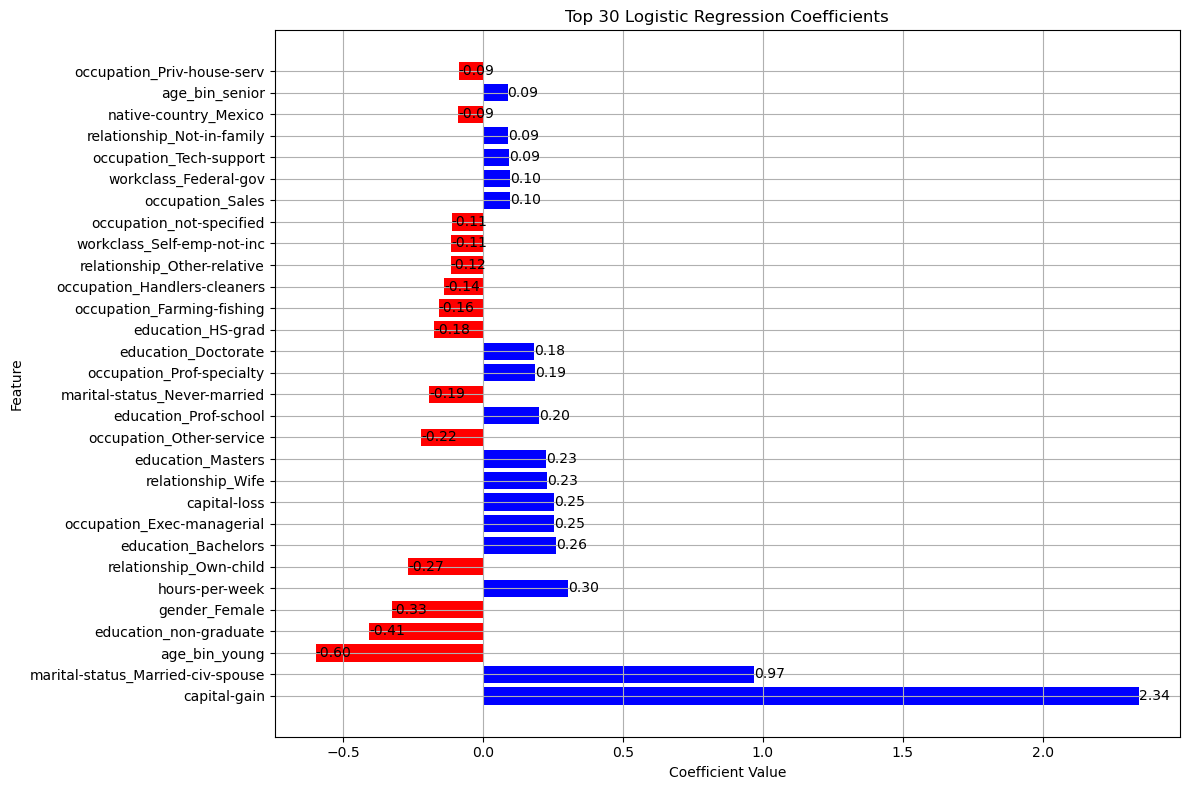

In [336]:
coefficients = best_log_reg.coef_[0]
feature_names = df_one_hot_encoded.drop(columns=['income']).columns
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)
top_30_coeff_df = coeff_df.head(30)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_30_coeff_df['Feature'], top_30_coeff_df['Coefficient'], 
                color=['b' if x > 0 else 'r' for x in top_30_coeff_df['Coefficient']])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 30 Logistic Regression Coefficients')
plt.grid(True)
plt.tight_layout()
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

plt.show()

### Objectives for Classification Model
6. **Model Deployment**: Prepare the final model for deployment.
    - Save the trained model and create a pipeline for new data predictions.

### Objectives for Classification Model
7. **Model Validation**: Validate the model on unseen data.
    - Ensure that the model generalizes well to new, unseen data by testing it on a separate validation set or using techniques like k-fold cross-validation.